# Time Series Forecasting - Identifying a random walk

## This notebook is to show how a random walk can be identified in gold prices dataset from https://www.kaggle.com/datasets/jishnukoliyadan/gold-price-1979-present

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

## Read Monthly gold prices file. There are two other files in this dataset - Yearly and Quarterly gold prices

In [2]:
monthly_gold_price = pd.read_csv(filepath_or_buffer='Monthly_Gold_Price_on_World.csv', sep=',', header=0)

## There are 512 consecutive timesteps

In [3]:
monthly_gold_price.shape

(518, 20)

In [4]:
monthly_gold_price.head(5)

,Date,US dollar (USD),Euro (EUR),Japanese yen (JPY),Pound sterling (GBP),Canadian dollar (CAD),Swiss franc (CHF),Indian rupee (INR),Chinese renmimbi (CNY),Turkish lira (TRY),Saudi riyal (SAR),Indonesian rupiah (IDR),UAE dirham (AED),Thai baht THB),Vietnamese dong (VND),Egyptian pound (EGP),Korean won (KRW),Russian ruble (RUB),South African rand (ZAR),Australian dollar (AUD)
0,1979-01-31,233.7,144.84,45160.33,117.44,267.10,379.32,1840.82,0.0,0.0,745.20,139739.28,856.14,4511.27,0.0,0.0,108235.82,0.0,194.53,197.17
1,1979-02-28,251.3,154.64,50209.08,124.19,295.50,413.61,2011.68,0.0,0.0,827.84,154683.13,946.62,4985.70,0.0,0.0,119929.27,0.0,209.36,219.63
2,1979-03-30,240.1,148.04,50274.29,116.22,278.16,406.20,1940.16,0.0,0.0,796.73,148844.15,910.39,4812.88,0.0,0.0,116123.63,0.0,202.37,214.55
3,1979-04-30,245.3,152.76,54144.57,118.82,278.53,420.01,2013.10,0.0,0.0,819.39,152453.63,930.21,4890.99,0.0,0.0,117423.25,0.0,206.91,221.12
4,1979-05-31,274.6,172.00,61057.09,132.69,321.62,478.01,2253.41,0.0,0.0,933.26,171656.12,1048.41,5560.75,0.0,0.0,133889.58,0.0,233.65,250.72


## Verify if there is only entry for each timestep

In [5]:
len(monthly_gold_price['Date'].unique()) == monthly_gold_price.shape[0]

True

## We're interested only in the timestep and the data value which is gold price in USD

In [6]:
monthly_gold_price = monthly_gold_price[['Date', 'US dollar (USD)']]

In [7]:
monthly_gold_price.head(5)

,Date,US dollar (USD)
0,1979-01-31,233.7
1,1979-02-28,251.3
2,1979-03-30,240.1
3,1979-04-30,245.3
4,1979-05-31,274.6


## Set test data size to 20%

In [8]:
test_dataset_count = int(np.ceil(len(monthly_gold_price)*0.2))

In [9]:
test_dataset_count

104

## Plot entire dataset, shading the test dataset in grey

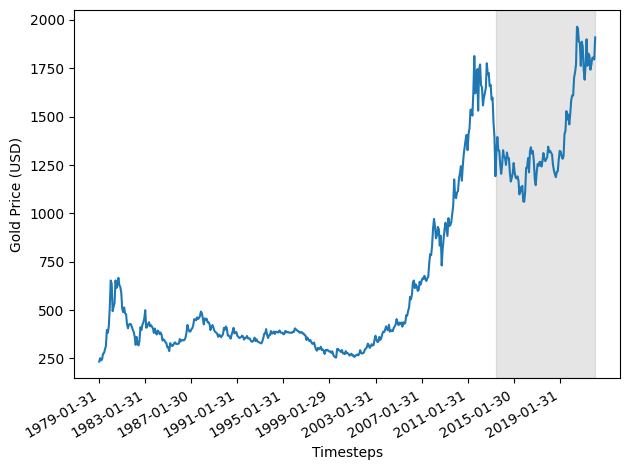

In [10]:
fig, ax = plt.subplots()

ax.plot(monthly_gold_price['Date'], monthly_gold_price['US dollar (USD)'])
ax.set_xlabel('Timesteps')
ax.set_ylabel('Gold Price (USD)')
ax.axvspan(
            min(monthly_gold_price.index.to_list()[-test_dataset_count:]), 
            max(monthly_gold_price.index.to_list()[-test_dataset_count:]), 
            color='#808080', 
            alpha=0.2
          )

plt.xticks(np.arange(0, len(monthly_gold_price)+1, 48))

fig.autofmt_xdate()
plt.tight_layout()

## Separate into train and test. In time series, data points have to be consecutive, so we don't do any shuffling.

In [11]:
train = monthly_gold_price[:-test_dataset_count]
test = monthly_gold_price[-test_dataset_count:]

# TEST FOR A RANDOM WALK :-
## Get ADF statistic (Augmented Dickey-Fuller Test) to test whether our data (train dataset) is stationary or not.
## The null hypothesis is that data is not stationary. Alternative hypothesis is that data is stationary. When ADF statistic is a large negative number and p-value is less than 0.05, we reject the null hypothesis and conclude that data is stationary.
## If data is not stationary, we one-difference the data and recheck for ADF statistic. 
## After data becomes stationary, we plot ACF (Auto-correlation Function) to see if there are any significant coefficients. If Yes, then the data is not a random walk, If No, then we conclude that data is a random walk. 

In [12]:
ADF_result = adfuller(train['US dollar (USD)'])

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -2.2925730827429494
p-value: 0.17437448974055464


## We see that p-value is not less than 0.05, so we cannot reject the null hypothesis (i.e. data is not stationary). Just for sake of curiosity, our ACF plot looks as below.

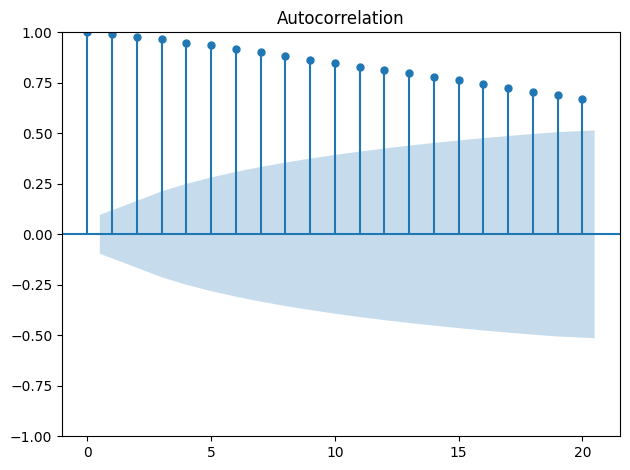

In [13]:
plot_acf(train['US dollar (USD)'], lags=20);
plt.tight_layout()

## Difference the data. If we difference once, we lose one data point due to differencing. If we do it twice, we lose two data points, and so on.

In [14]:
diff_random_walk = np.diff(train['US dollar (USD)'], n=1)

## Plot the differenced data. We see below, that the trend has been removed from the data. We can roughly assume that the data is not stationary. But let's still find the ADF statistic. 

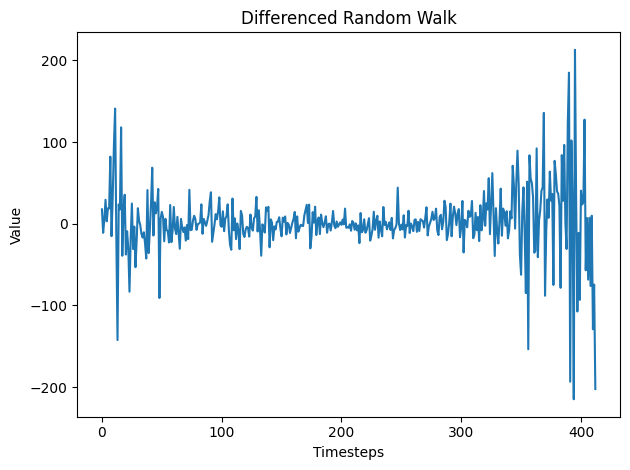

In [15]:
plt.plot(diff_random_walk)
plt.title('Differenced Random Walk')
plt.xlabel('Timesteps')
plt.ylabel('Value')
plt.tight_layout()

## Find ADF statistic. The p-value is less than 0.05, so we can reject null hypothesis and conclude that the differences data is stationary. 

In [16]:
ADF_result = adfuller(diff_random_walk)
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -3.7372816150475585
p-value: 0.0036182885641485134


## Plot ACF. We see that, although there are significant coefficients at lag = 1, 3, 6, 11, there are no consecutive significant coefficients between 0 and any of these lags. We can conclude that there are no significant coefficients. Hence, the data is a random walk, which cannot be predicted with any forecasting methodology. Some very crude ways to create predictions could be average of the last N values, or average of the values in the past for the same period, or a simple linear regression. However, none of these predictions would be backed by a robust model.   

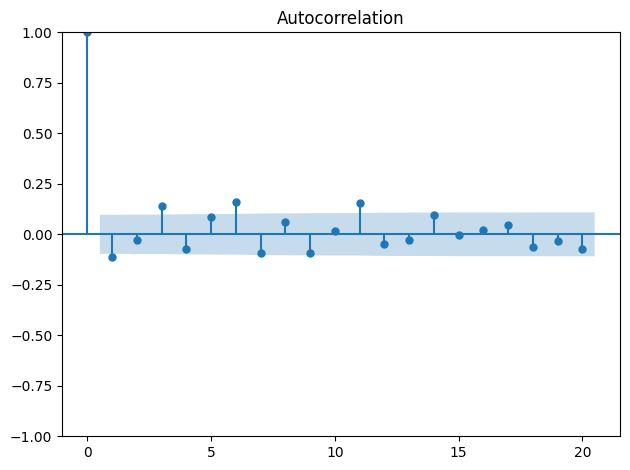

In [17]:
plot_acf(diff_random_walk, lags=20);
plt.tight_layout()